import the datasets

In [31]:
global_flow <- read.csv("../data/global_flow.csv")

In [32]:
print(global_flow)

       region_orig region_orig_id      region_dest region_dest_id
1    North America              1    North America              1
2    North America              1    North America              1
3    North America              1           Africa              2
4    North America              1           Africa              2
5    North America              1           Africa              2
6    North America              1           Africa              2
7    North America              1           Africa              2
8    North America              1           Africa              2
9    North America              1           Africa              2
10   North America              1           Africa              2
11   North America              1           Africa              2
12   North America              1           Africa              2
13   North America              1           Africa              2
14   North America              1           Africa              2
15   North

In [33]:
print(head(global_flow))

    region_orig region_orig_id   region_dest region_dest_id  country_orig
1 North America              1 North America              1        Canada
2 North America              1 North America              1 United States
3 North America              1        Africa              2        Canada
4 North America              1        Africa              2        Canada
5 North America              1        Africa              2        Canada
6 North America              1        Africa              2        Canada
  country_orig_id  country_dest country_dest_id regionflow_1990 regionflow_1995
1             CAN United States             USA           57617          191071
2             USA        Canada             CAN           57617          191071
3             CAN        Angola             AGO          103553           15550
4             CAN       Burundi             BDI          103553           15550
5             CAN         Benin             BEN          103553           15550
6 

In [34]:
dim(global_flow)    # gives the dimension of the dataframe

[1] 38416    20

In [35]:
economic_factors <- read.csv("../data/economic_factors.csv")

In [36]:
print(economic_factors)

                      Country_name Country_code       Avg_mig Health_exp
1                        Argentina          ARG   -50312.1250   8.311000
2                        Australia          AUS   708995.6875   7.377675
3                           Brazil          BRA      995.2500   8.001525
4                            China          CHN -1708274.8750   6.684325
5                           France          FRA   489693.4375   6.030975
6                          Germany          DEU   943074.1875  10.251525
7                            India          IND -1950363.4380   8.884875
8                        Indonesia          IDN  -775860.8750   3.716750
9                            Italy          ITA   907286.4375   3.705350
10                           Japan          JPN   469323.1250   8.069950
11                     Korea, Rep.          KOR    40211.6250   7.150325
12                          Mexico          MEX -1489605.8750   5.344825
13                     Netherlands          NLD   1

In [37]:
print(head(economic_factors))

  Country_name Country_code     Avg_mig Health_exp Consum_exp National_incP.C
1    Argentina          ARG   -50312.12   8.311000   81.25280        4.388200
2    Australia          AUS   708995.69   7.377675   76.13213        1.755725
3       Brazil          BRA      995.25   8.001525   77.48760        1.779575
4        China          CHN -1708274.88   6.684325   68.52263        0.000000
5       France          FRA   489693.44   6.030975   65.89383        0.743875
6      Germany          DEU   943074.19  10.251525   76.64495        1.359525
  National_inc Prim_enrol_rate Current_accbal Employers_total Employment_serv
1     5.592575        98.62908       0.774550        4.554175        73.61707
2     3.118850        95.71210      -4.794625        0.000000        67.68550
3     3.146625        72.06120      -0.978300        4.089175        58.45500
4     0.000000        46.68240       3.657850        0.000000        31.00538
5     1.321050        99.23883       0.226875        4.509575   

In [38]:
dim(economic_factors)   # gives the dimension of the dataframe

[1] 190  28

In [39]:
# create a new binary variable "migrated"
migrated <- ifelse(
                    global_flow$countryflow_1990 == "0" &
                    global_flow$countryflow_1995 == "0" &
                    global_flow$countryflow_2000 == "0" &
                    global_flow$countryflow_2005 == "0", 0, 1
                    )

In [40]:
# create a new dataframe with global_flow and migrated
df <- data.frame(global_flow, migrated)

In [41]:
head(df)

,region_orig,region_orig_id,region_dest,region_dest_id,country_orig,country_orig_id,country_dest,country_dest_id,regionflow_1990,regionflow_1995,⋯,regionflow_2005,countryflow_1990,countryflow_1995,countryflow_2000,countryflow_2005,From_Latitude,From.Longitude,To.Latitude,To.Longitude,migrated
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,North America,1,North America,1,Canada,CAN,United States,USA,57617,191071,⋯,96102,1509,190436,238,28,45.41666667,-75.7,38.883333,-77,1
2,North America,1,North America,1,United States,USA,Canada,CAN,57617,191071,⋯,96102,56108,635,84430,96074,38.883333,-77,45.41666667,-75.7,1
3,North America,1,Africa,2,Canada,CAN,Angola,AGO,103553,15550,⋯,63080,1831,0,68,20,45.41666667,-75.7,-8.833333333,13.216667,1
4,North America,1,Africa,2,Canada,CAN,Burundi,BDI,103553,15550,⋯,63080,0,0,0,2121,45.41666667,-75.7,-3.366666667,29.35,1
5,North America,1,Africa,2,Canada,CAN,Benin,BEN,103553,15550,⋯,63080,21,0,0,0,45.41666667,-75.7,6.483333333,2.616667,1
6,North America,1,Africa,2,Canada,CAN,Burkina Faso,BFA,103553,15550,⋯,63080,669,0,0,0,45.41666667,-75.7,12.36666667,-1.516667,1


In [42]:
dim(df)

[1] 38416    21

In [43]:
# rename variable names in economic_factors
names(economic_factors)[1] <- "country_name"
names(economic_factors)[2] <- "country_code"
names(economic_factors)[3] <- "average_migration"
names(economic_factors)[4] <- "health_expenditure"
names(economic_factors)[5] <- "consumption_expenditure"
names(economic_factors)[6] <- "national_income_per_capita"
names(economic_factors)[7] <- "national_income"
names(economic_factors)[8] <- "primary_enrollment_rate"
names(economic_factors)[9] <- "current_account_balance"
names(economic_factors)[10] <- "employers_total"
names(economic_factors)[11] <- "employment_services"
names(economic_factors)[12] <- "employment_industry"
names(economic_factors)[13] <- "employment_agriculture"
names(economic_factors)[14] <- "expense"
names(economic_factors)[15] <- "gdp_growth"
names(economic_factors)[16] <- "high_tech_exports"
names(economic_factors)[17] <- "hiv_incidence"
names(economic_factors)[18] <- "labor_participation_rate"
names(economic_factors)[19] <- "life_expectancy_at_birth"
names(economic_factors)[20] <- "population_total"
names(economic_factors)[21] <- "population_density"
names(economic_factors)[22] <- "population_slums"
names(economic_factors)[23] <- "tax_revenue"
names(economic_factors)[24] <- "tech_grants"
names(economic_factors)[25] <- "literacy_rate_15_24"
names(economic_factors)[26] <- "snP_equity_index"
names(economic_factors)[27] <- "reg_business"

In [44]:
colnames(economic_factors)
economic_factors <- economic_factors[!apply(is.na(economic_factors) | economic_factors == "", 1, all),]

[1] "country_name"               "country_code"              
 [3] "average_migration"          "health_expenditure"        
 [5] "consumption_expenditure"    "national_income_per_capita"
 [7] "national_income"            "primary_enrollment_rate"   
 [9] "current_account_balance"    "employers_total"           
[11] "employment_services"        "employment_industry"       
[13] "employment_agriculture"     "expense"                   
[15] "gdp_growth"                 "high_tech_exports"         
[17] "hiv_incidence"              "labor_participation_rate"  
[19] "life_expectancy_at_birth"   "population_total"          
[21] "population_density"         "population_slums"          
[23] "tax_revenue"                "tech_grants"               
[25] "literacy_rate_15_24"        "snP_equity_index"          
[27] "reg_business"               "migration"

k means clustering

In [45]:
economic_factors_scaled <- scale(
    data.frame(
        economic_factors["average_migration"],
        economic_factors["health_expenditure"],
        economic_factors["consumption_expenditure"],
        economic_factors["national_income_per_capita"],
        economic_factors["national_income"],
        economic_factors["primary_enrollment_rate"],
        economic_factors["current_account_balance"],
        economic_factors["employers_total"],
        economic_factors["employment_services"],
        economic_factors["employment_industry"],
        economic_factors["employment_agriculture"],
        economic_factors["expense"],
        economic_factors["gdp_growth"],
        economic_factors["high_tech_exports"],
        economic_factors["hiv_incidence"],
        economic_factors["labor_participation_rate"],
        economic_factors["life_expectancy_at_birth"],
        economic_factors["population_total"],
        economic_factors["population_density"],
        economic_factors["population_slums"],
        economic_factors["tax_revenue"],
        economic_factors["tech_grants"],
        economic_factors["literacy_rate_15_24"],
        economic_factors["snP_equity_index"],
        economic_factors["reg_business"]
    )
)

In [46]:
install.packages("ggplot2")

Installing package into '/Users/robsontrajano/Library/R/x86_64/4.1/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T//RtmpDCJd09/downloaded_packages


[1] "average_migration"          "health_expenditure"        
 [3] "consumption_expenditure"    "national_income_per_capita"
 [5] "national_income"            "primary_enrollment_rate"   
 [7] "current_account_balance"    "employers_total"           
 [9] "employment_services"        "employment_industry"       
[11] "employment_agriculture"     "expense"                   
[13] "gdp_growth"                 "high_tech_exports"         
[15] "hiv_incidence"              "labor_participation_rate"  
[17] "life_expectancy_at_birth"   "population_total"          
[19] "population_density"         "population_slums"          
[21] "tax_revenue"                "tech_grants"               
[23] "literacy_rate_15_24"        "snP_equity_index"          
[25] "reg_business"

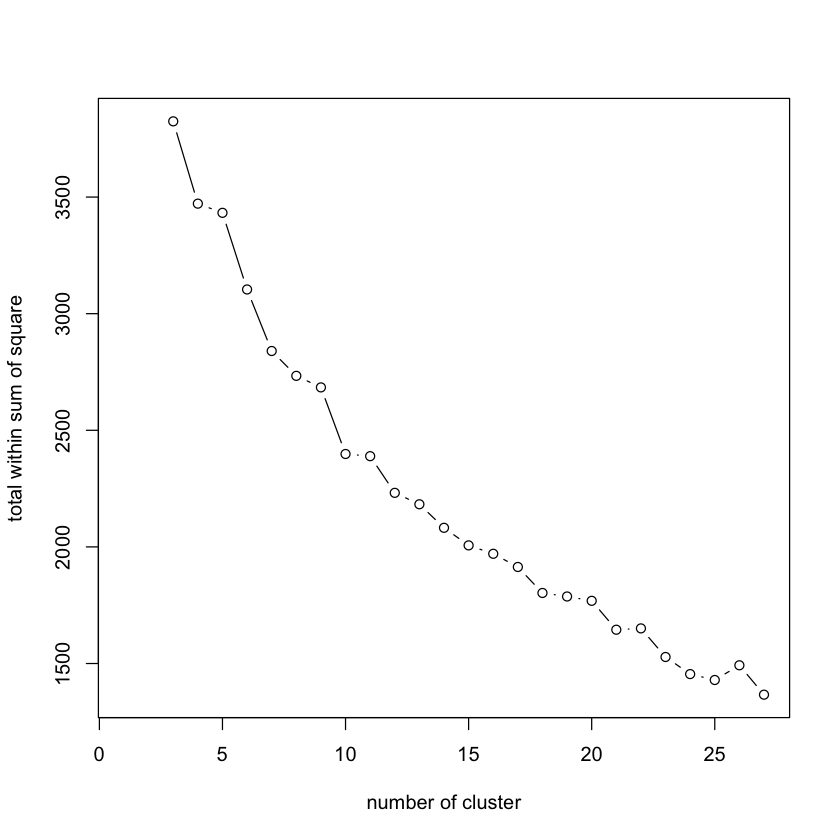

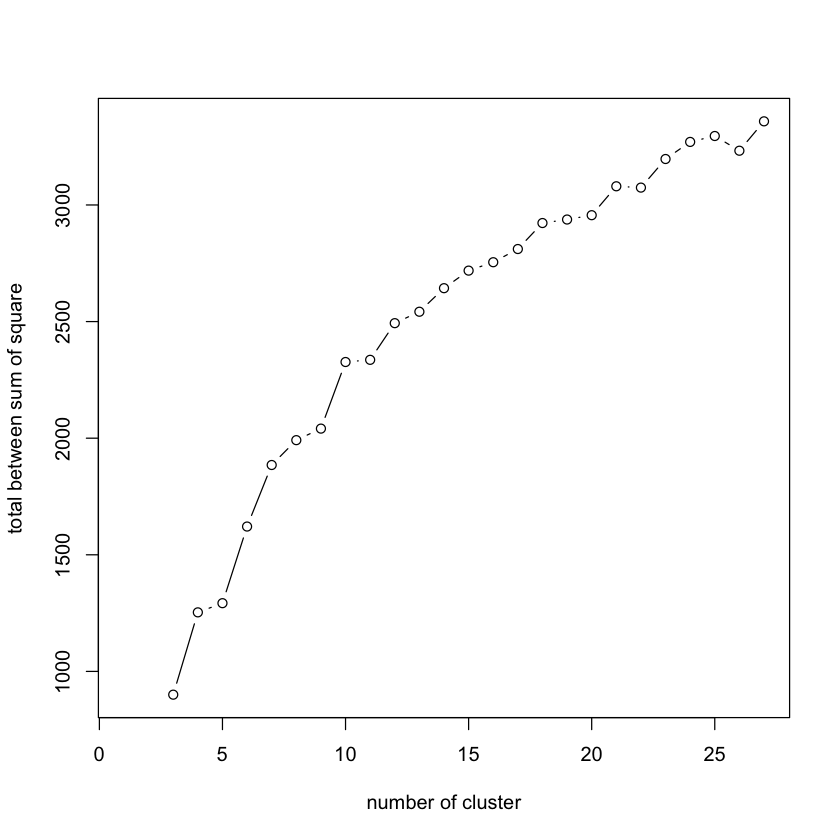

In [47]:
colnames(economic_factors_scaled)
totwss <- vector()
btwss <- vector()

for (i in 3:27) {
    temp <- kmeans(economic_factors_scaled, centers = i)
    totwss[i] <- temp$tot.withinss
    btwss[i] <- temp$betweenss
}

plot(totwss, xlab = "number of cluster", type = "b", ylab = "total within sum of square")
plot(btwss, xlab = "number of cluster", type = "b", ylab = "total between sum of square")

In [50]:
# install.packages("Rserve", repos = "http://cran.us.r-project.org")

Installing package into '/Users/robsontrajano/Library/R/x86_64/4.1/library'
(as 'lib' is unspecified)




The downloaded binary packages are in
	/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T//RtmpDCJd09/downloaded_packages


In [51]:
library(Rserve)
Rserve()

Starting Rserve:
 /Library/Frameworks/R.framework/Resources/bin/R CMD /Users/robsontrajano/Library/R/x86_64/4.1/library/Rserve/libs//Rserve 



decision tree

In [54]:
install.packages("rattle", repos = "http://cran.us.r-project.org")

Installing package into '/Users/robsontrajano/Library/R/x86_64/4.1/library'
(as 'lib' is unspecified)

also installing the dependencies 'XML', 'rpart.plot'





The downloaded binary packages are in
	/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T//RtmpDCJd09/downloaded_packages


In [55]:
library(rpart)
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [56]:
fit <- rpart(
    migration ~ average_migration +
                health_expenditure +
                consumption_expenditure +
                national_income_per_capita +
                national_income +
                primary_enrollment_rate +
                current_account_balance +
                employers_total +
                employment_services +
                employment_industry +
                employment_agriculture +
                expense +
                gdp_growth +
                high_tech_exports +
                hiv_incidence +
                labor_participation_rate +
                life_expectancy_at_birth +
                population_total +
                population_density +
                population_slums +
                tax_revenue +
                tech_grants +
                literacy_rate_15_24 +
                snP_equity_index +
                reg_business,
                method = "class",
                data = economic_factors
)

In [57]:
printcp(fit)


Classification tree:
rpart(formula = migration ~ average_migration + health_expenditure + 
    consumption_expenditure + national_income_per_capita + national_income + 
    primary_enrollment_rate + current_account_balance + employers_total + 
    employment_services + employment_industry + employment_agriculture + 
    expense + gdp_growth + high_tech_exports + hiv_incidence + 
    labor_participation_rate + life_expectancy_at_birth + population_total + 
    population_density + population_slums + tax_revenue + tech_grants + 
    literacy_rate_15_24 + snP_equity_index + reg_business, data = economic_factors, 
    method = "class")

Variables actually used in tree construction:
[1] average_migration

Root node error: 106/190 = 0.55789

n= 190 

       CP nsplit rel error   xerror     xstd
1 0.64151      0   1.00000 1.000000 0.064582
2 0.18868      1   0.35849 0.358491 0.052015
3 0.16981      2   0.16981 0.273585 0.046766
4 0.01000      3   0.00000 0.018868 0.013271


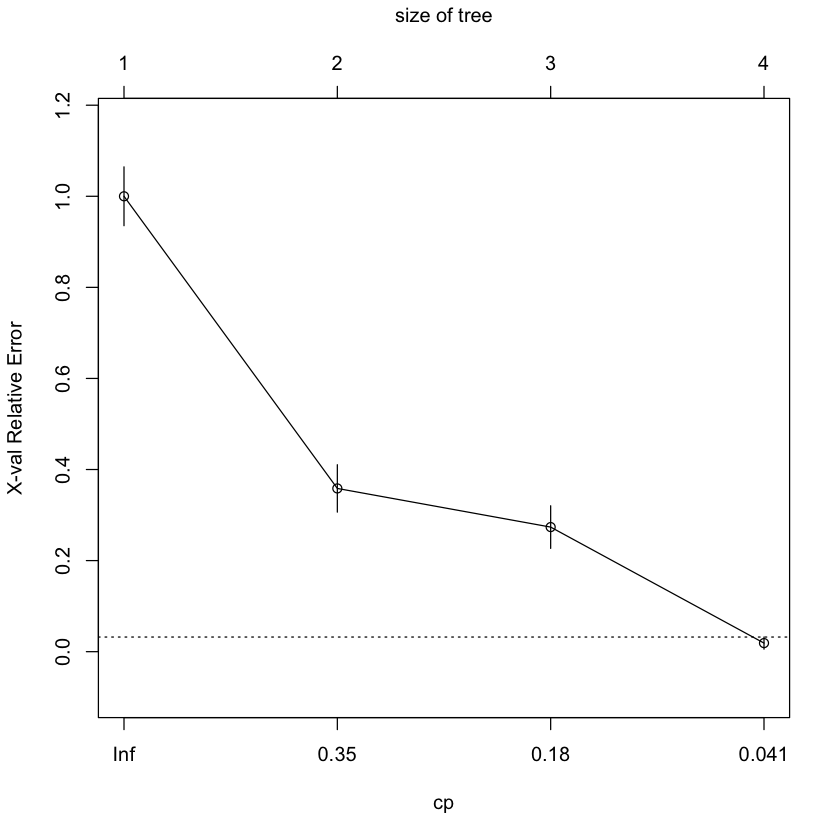

In [58]:
plotcp(fit)

In [59]:
summary(fit)

Call:
rpart(formula = migration ~ average_migration + health_expenditure + 
    consumption_expenditure + national_income_per_capita + national_income + 
    primary_enrollment_rate + current_account_balance + employers_total + 
    employment_services + employment_industry + employment_agriculture + 
    expense + gdp_growth + high_tech_exports + hiv_incidence + 
    labor_participation_rate + life_expectancy_at_birth + population_total + 
    population_density + population_slums + tax_revenue + tech_grants + 
    literacy_rate_15_24 + snP_equity_index + reg_business, data = economic_factors, 
    method = "class")
  n= 190 

         CP nsplit rel error     xerror       xstd
1 0.6415094      0 1.0000000 1.00000000 0.06458176
2 0.1886792      1 0.3584906 0.35849057 0.05201528
3 0.1698113      2 0.1698113 0.27358491 0.04676590
4 0.0100000      3 0.0000000 0.01886792 0.01327123

Variable importance
       average_migration        high_tech_exports              tech_grants 
            

In [60]:
decision_tree <- economic_factors
set.seed(1)
test <- sample(1:nrow(decision_tree), nrow(decision_tree) / 4)
train <- -test
training_data <- decision_tree[train,]
testing_data <- decision_tree[test,]
testing_survived <- decision_tree$mig_class[test]
tree_predict <- predict(fit, testing_data, type = "class")
mean(tree_predict != testing_survived)

[1] NaN

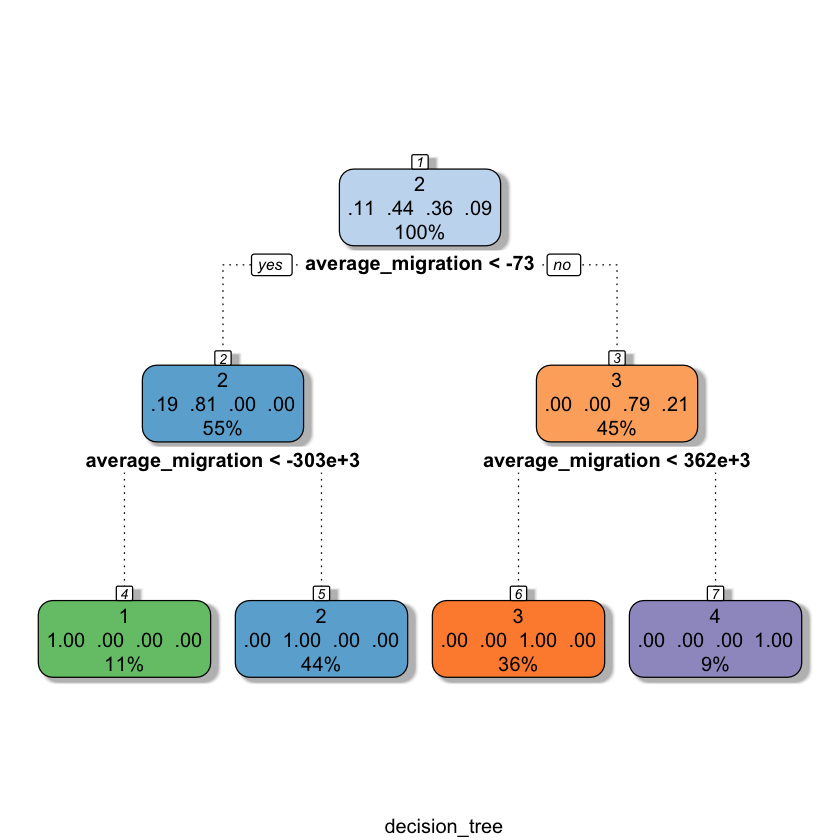

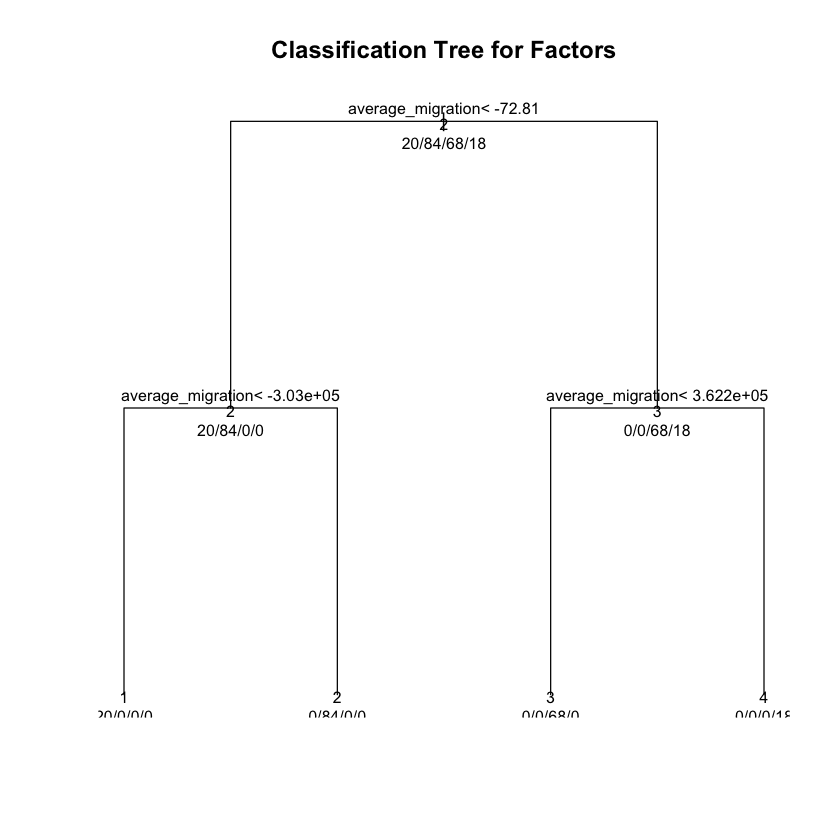

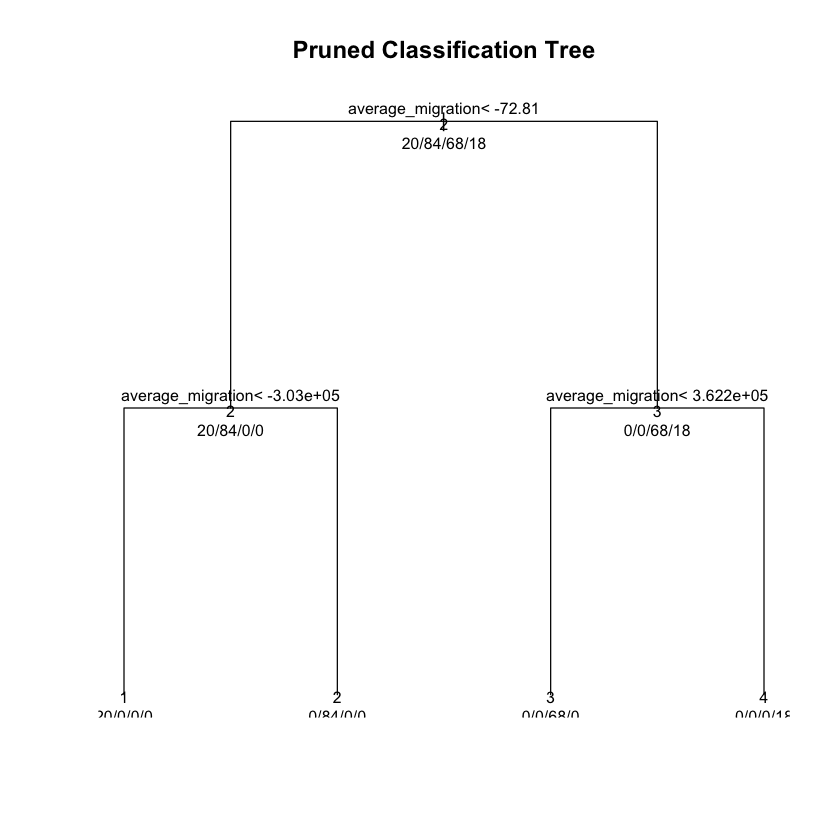

In [61]:
#visualizing the Decision tree
library(rpart.plot)
library(RColorBrewer)
fancyRpartPlot(fit, sub = "decision_tree")
plot(fit, uniform = TRUE, main = "Classification Tree for Factors")
text(fit, use.n = TRUE, all = TRUE, cex = .8)
pfit <- prune(fit, cp = fit$cptable[which.min(fit$cptable[, "xerror"]), "CP"])
plot(pfit, uniform = TRUE, main = "Pruned Classification Tree")
text(pfit, use.n = TRUE, all = TRUE, cex = .8)
